In [1]:
# Install PyTorch and diffusers for Stable Diffusion
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install diffusers transformers accelerate


Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
!pip install diffusers

In [4]:
from diffusers import StableDiffusionPipeline


In [5]:
import torch

In [6]:
# Load Stable Diffusion model
model_id = "runwayml/stable-diffusion-v1-5"  # Pre-trained model
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16
).to("cuda")  # Use GPU for faster computation

print("Model loaded successfully!")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Model loaded successfully!


In [7]:
# Define a text prompt
prompt = "A fantasy landscape with mountains, a river, and a castle, digital art"

# Generate an image
image = pipe(prompt).images[0]

# Save and display the image
image.save("generated_image.png")
image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

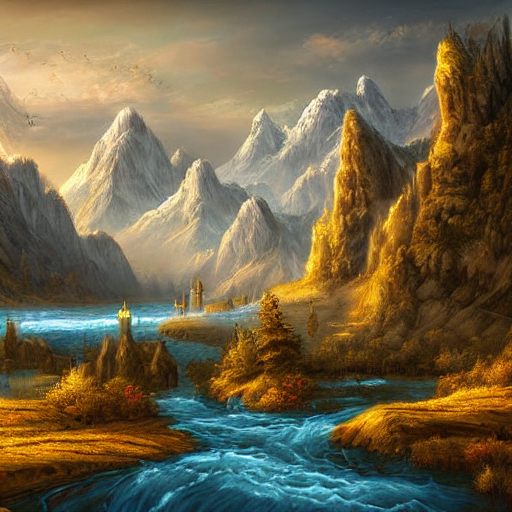

In [10]:
from IPython.display import display
from PIL import Image

# After generating the image
image = pipe(prompt).images[0]

# Display the image
display(image)


In [8]:
# Function to generate an image with customization
def generate_image(prompt, guidance_scale=7.5, seed=None):
    generator = torch.manual_seed(seed) if seed else None
    image = pipe(prompt, guidance_scale=guidance_scale, generator=generator).images[0]
    image.save("custom_generated_image.png")
    image.show()

# Example usage with customized parameters
generate_image(
    prompt="A futuristic city at sunset, cinematic, ultra-realistic",
    guidance_scale=8.5,
    seed=42
)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

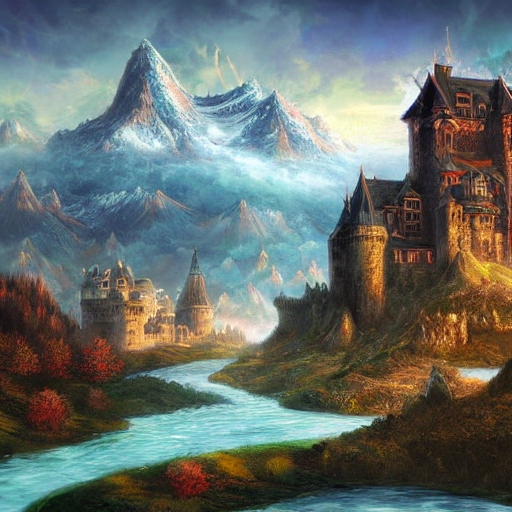

In [11]:
from IPython.display import display
from PIL import Image

# After generating the image
image = pipe(prompt).images[0]

# Display the image
display(image)


In [9]:
from IPython.display import display
import ipywidgets as widgets

# Create widgets
prompt_widget = widgets.Text(
    value="A beautiful forest with sunlight streaming through trees, digital painting",
    description="Prompt:",
    style={'description_width': 'initial'}
)
guidance_slider = widgets.FloatSlider(
    value=7.5, min=1.0, max=15.0, step=0.5,
    description="Guidance Scale:",
    style={'description_width': 'initial'}
)
seed_widget = widgets.IntText(
    value=42,
    description="Seed:",
    style={'description_width': 'initial'}
)
generate_button = widgets.Button(description="Generate Image")

# Function to handle image generation
def on_generate_click(b):
    prompt = prompt_widget.value
    guidance_scale = guidance_slider.value
    seed = seed_widget.value
    generate_image(prompt, guidance_scale, seed)

generate_button.on_click(on_generate_click)

# Display the widgets
display(prompt_widget, guidance_slider, seed_widget, generate_button)


Text(value='A beautiful forest with sunlight streaming through trees, digital painting', description='Prompt:'…

FloatSlider(value=7.5, description='Guidance Scale:', max=15.0, min=1.0, step=0.5, style=SliderStyle(descripti…

IntText(value=42, description='Seed:', style=DescriptionStyle(description_width='initial'))

Button(description='Generate Image', style=ButtonStyle())

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

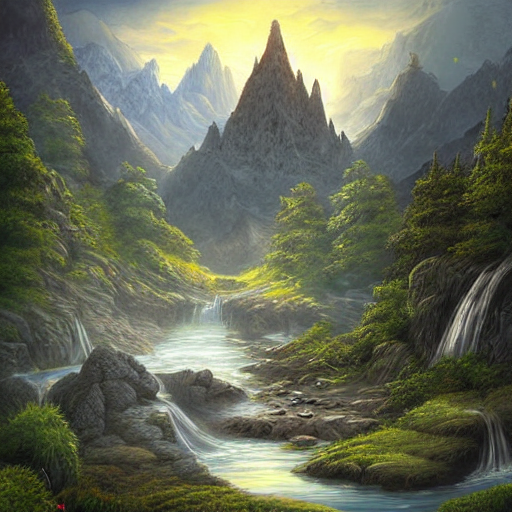

In [12]:
from IPython.display import display
from PIL import Image

# After generating the image
image = pipe(prompt).images[0]

# Display the image
display(image)


In [13]:
from google.colab import files

# Function to download the last generated image
def download_image():
    files.download("custom_generated_image.png")

download_image()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>